# GBM Localizations and Sky Maps
As part of mission operations, GBM produces localizations for GRBs and disseminates these to the community.  GCN notices are sent to interested follow-up observers containing brief summary information, and HEALPix FITS files containing the localization are created and hosted at the Fermi Science Support Center.  These localizations contain the best-modeled systematic uncertainty in the localization and contain a host of metadata such as the individual detector pointings and the geocenter location as observed by Fermi.

You can read one of these HEALPix files using the ```GbmHealPix``` class:

In [1]:
from gbm import test_data_dir
from gbm.data import GbmHealPix

# open a GBM localization
loc = GbmHealPix.open(test_data_dir+'/glg_healpix_all_bn190915240_v00.fit')
print(loc)

glg_healpix_all_bn190915240_v00.fit


You can easily access the HEALPix-specific info:

In [2]:
print('Healpix nside: {}'.format(loc.nside))
print('Healpix npix: {}'.format(loc.npix))
print('Pixel area (sq. deg.): {}'.format(loc.pixel_area))

Healpix nside: 128
Healpix npix: 196608
Pixel area (sq. deg.): 0.20982341130279172


As for the localization information, you can retrieve the sky position with the highest probability (centroid): 

In [3]:
loc.centroid

(48.8671875, 4.181528273111476)

Or you can determine the probability of the localization at a particular point in the sky:

In [4]:
loc.probability(49.0, 4.0)

0.009200395297273567

And if you want to determine the confidence level a particular point on the sky is relative to the localization:

In [5]:
loc.confidence(40.0, 4.0)

0.865783539232832

Often for follow-up observations, it's useful to know how much sky area the localization covers at a some confidence level:

In [6]:
loc.area(0.9) # 90% confidence in units of sq. degrees

281.1633711457409

And for plotting or other purposes, you can retrieve the RA and Dec "paths" for a given confidence region. 

**Note:** *A confidence region may have many disjoint pieces, so this will be a list of arrays*

In [7]:
%matplotlib agg
loc.confidence_region_path(0.5)

[array([[ 4.61281337e+01,  2.59721728e-01],
        [ 4.53138456e+01,  5.02793296e-01],
        [ 4.51253482e+01,  6.21222158e-01],
        [ 4.43160681e+01,  1.50837989e+00],
        [ 4.41225627e+01,  2.36616357e+00],
        [ 4.40920226e+01,  2.51396648e+00],
        [ 4.38604592e+01,  3.51955307e+00],
        [ 4.38130019e+01,  4.52513966e+00],
        [ 4.41225627e+01,  5.23313031e+00],
        [ 4.43770701e+01,  5.53072626e+00],
        [ 4.50410901e+01,  6.53631285e+00],
        [ 4.51253482e+01,  6.62602576e+00],
        [ 4.61281337e+01,  7.28272773e+00],
        [ 4.66920493e+01,  7.54189944e+00],
        [ 4.71309192e+01,  7.65985811e+00],
        [ 4.81337047e+01,  7.71980664e+00],
        [ 4.91364903e+01,  8.00964739e+00],
        [ 5.01392758e+01,  8.17249985e+00],
        [ 5.11420613e+01,  7.90708927e+00],
        [ 5.21448468e+01,  7.74393795e+00],
        [ 5.25325056e+01,  7.54189944e+00],
        [ 5.31476323e+01,  7.20106267e+00],
        [ 5.41504178e+01,  6.998

You can even determine the probability that a point source at a given location is association with the skymap (as opposed to the null hypothesis of two spatially-unrelated sources):

In [8]:
# find the probability that a point source on the sky is associated with our skymap
print(loc.source_probability(50.0, 10.0))
print(loc.source_probability(150.0, 10.0))

0.9873891225982346
4.406012354285324e-15


You can also use the ```GbmHealPix.region_probability()``` function with another HEALPix object to return the probability that the two maps are spatially associated.

You can retrieve, as attributes, various other interesting tidbits:

In [9]:
# Info of other relevant things...
print('Sun location: {}'.format(loc.sun_location))
print('Geocenter location: {}'.format(loc.geo_location))
print('Geocenter radius: {} deg'.format(loc.geo_radius))
print('Detector n0 pointing: {}'.format(loc.n0_pointing))
print('Fraction of localization on Earth {}'.format(loc.geo_probability))


Sun location: (172.5011935415178, 3.23797213866954)
Geocenter location: (319.8312390218318, 17.40612934717674)
Geocenter radius: 67.2950460311874 deg
Detector n0 pointing: (146.5959532829778, 36.96759511828569)
Fraction of localization on Earth 8.442885759828031e-06


Of course, if you have a HEALPix file, you'll want to make a pretty sky map!

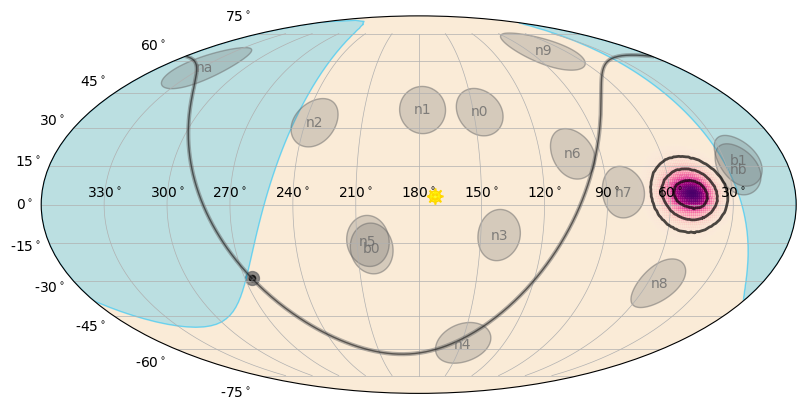

In [10]:
%matplotlib inline
from gbm.plot import SkyPlot

# initialize
skyplot = SkyPlot()

# add our HEALPix object
skyplot.add_healpix(loc)

w00t! This is for default plotting options, but you can do a lot of customization on what is plotted (more on that in [Visualizations](./Visualizations.ipynb)).  What if we want filled contours instead of a gradient, no Galactic Plane, and only some of the detectors?  Also, by default we're plotting the 1-, 2-, and 3-sigma contours, so we could plot the 50% and 90% instead:

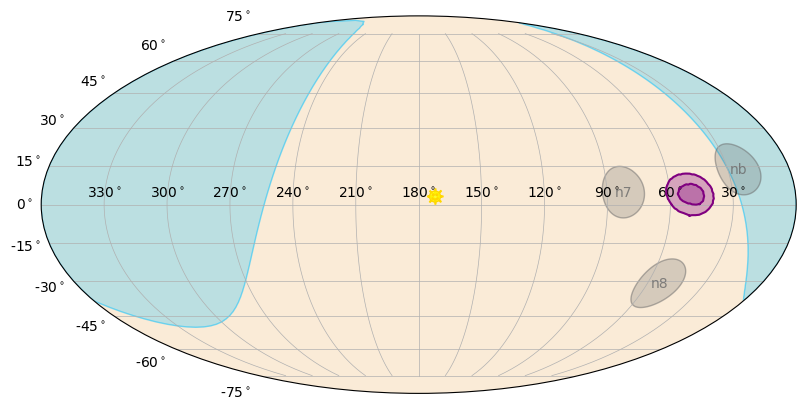

In [11]:
skyplot = SkyPlot()
skyplot.add_healpix(loc, gradient=False, clevels=[0.5, 0.9], galactic_plane=False, detectors=['n7', 'n8', 'nb'])

Sometimes localizations will have probability that overlaps the Earth. For primarily historical and logistical reasons, the GBM HEALPix maps don't remove any probability that falls on the Earth, but you can do that using the ```GbmHealPix.remove_earth()``` function, which will return you a new ```GbmHealPix``` object with the probability on the Earth removed.

In addition to reading existing GBM HEALPix maps, you can create your own!  In fact, you can build more generic maps using the ```HealPix``` class.  For example, let's create a 10-degree radius Gaussian centered at RA, Dec = 180.0, 0.0:

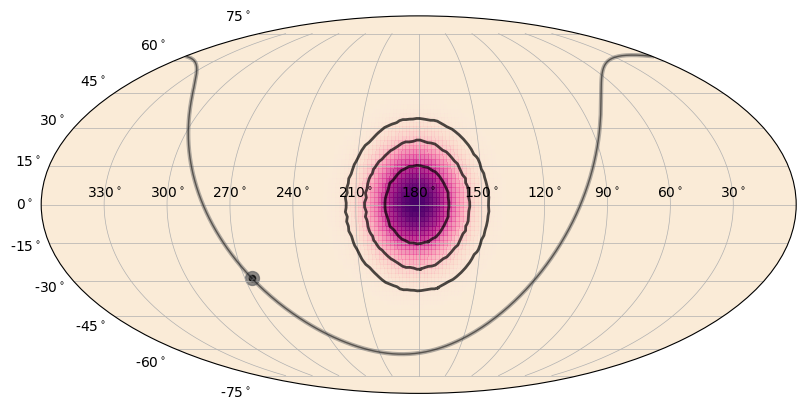

In [12]:
from gbm.data import HealPix

# 10 degree gaussian centered at RA,Dec = 180.0, 0.0
gauss_map = HealPix.from_gaussian(180.0, 0.0, 10.0)

skyplot = SkyPlot()
# set to False and empy because we have no info to plot
skyplot.add_healpix(gauss_map)

Or a 3-degree-width annulus on the sky centered at RA, Dec = 300.0, -30.0, with radius of 80 degrees:

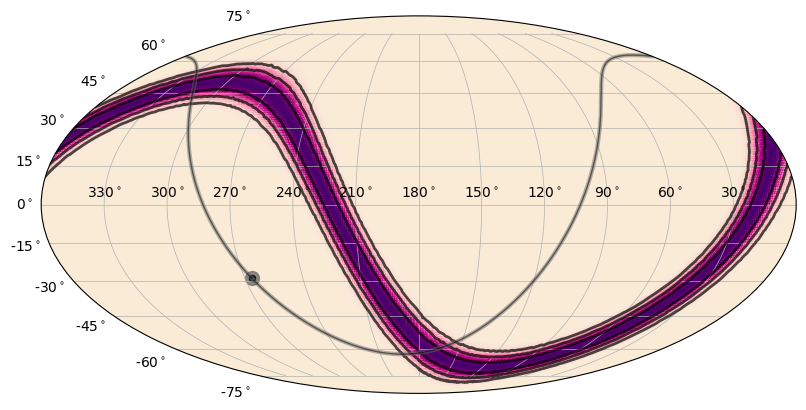

In [13]:
annulus_map = HealPix.from_annulus(300.0, -30, 80.0, 3.0)

skyplot = SkyPlot()
skyplot.add_healpix(annulus_map)

Or what if you only have a list of coordinates and you want to plot an equal-probability region on the sky:

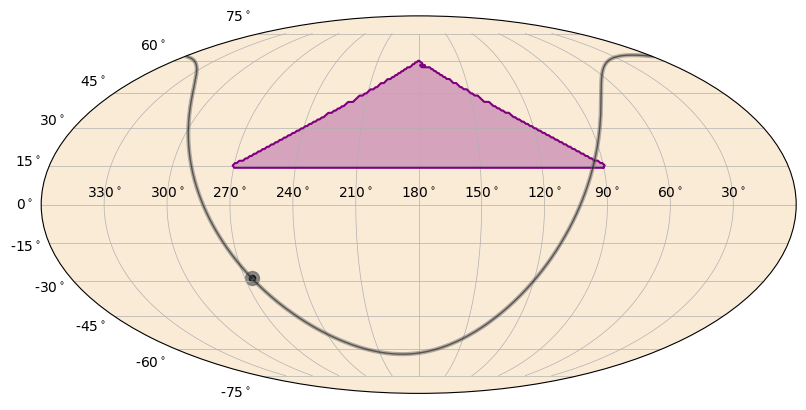

In [14]:
ra_pts = [270.0, 180.0, 90.0]
dec_pts = [15.0, 60.0, 15.0]

verts_map = HealPix.from_vertices(ra_pts, dec_pts, nside=128)
skyplot = SkyPlot()
skyplot.add_healpix(verts_map, earth=False, sun=False, detectors=[], gradient=False,clevels=[0.999])

You can even convolve your map with a Gaussian or a model that is built out of Gaussians:

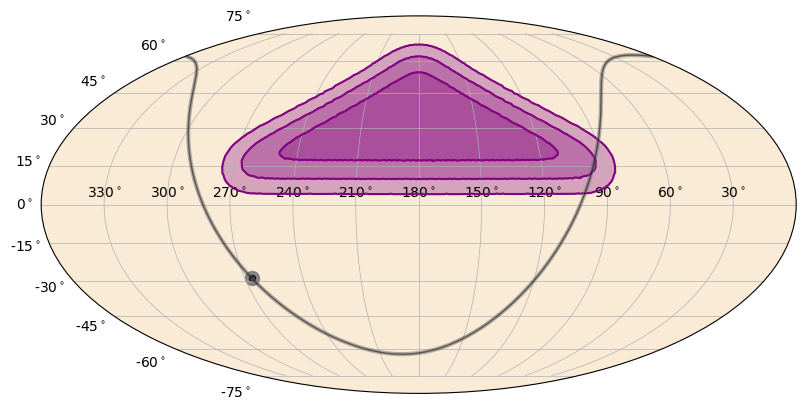

In [15]:
from numpy import deg2rad

# a single Gaussian of sigma_deg radius
def gauss_model(sigma_deg):
    sigma = deg2rad(sigma_deg)
    return ([sigma],[1.0])

# convolved with a 5-deg radius Gaussian
verts_convolved = verts_map.convolve(gauss_model, 5.0)

skyplot = SkyPlot()
skyplot.add_healpix(verts_convolved, gradient=False)

And finally, you can multiply maps together to produce a combined sky map:

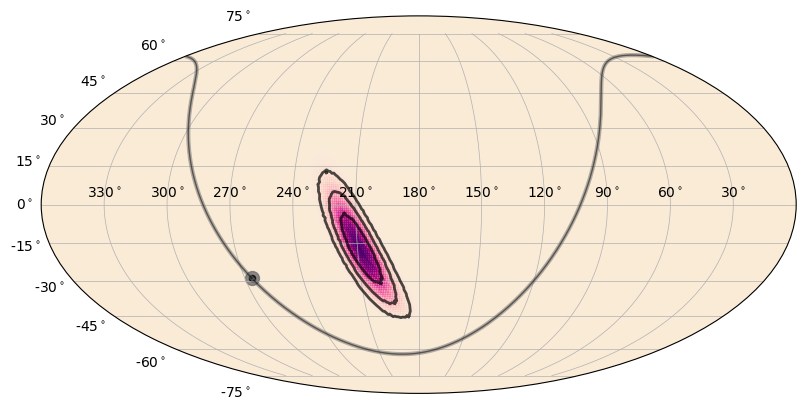

In [16]:
# multiply the Gaussian map with the annulus map
multiplied = HealPix.multiply(gauss_map, annulus_map)

skyplot = SkyPlot()
skyplot.add_healpix(multiplied)

Ok, enough about sky maps for now, continue to find out about [how to find and retrieve the GBM data you're looking for.](./DataFinders.ipynb)